# Prediction model for profit of 50_startups data

In [2]:
#Do transformations for getting better predictions of profit and
#make a table containing R^2 value for each prepared model.

#R&D Spend -- Research and devolop spend in the past few years
#Administration -- spend on administration in the past few years
#Marketing Spend -- spend on Marketing in the past few years
#State -- states from which data is collected
#Profit  -- profit of each state in the past few years

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [31]:
df=pd.read_csv("D:\\Gurumurthy Assignments\\Multi linear regression\\50_Startups.csv")

In [23]:
pt.shape


(50, 5)

In [6]:
pt.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
# EDA

In [8]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
pt[pt.duplicated()]  
# no data is duplicated

,R&D Spend,Administration,Marketing Spend,State,Profit


In [24]:
#corerlation analysis
# correlation matrix
pt.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


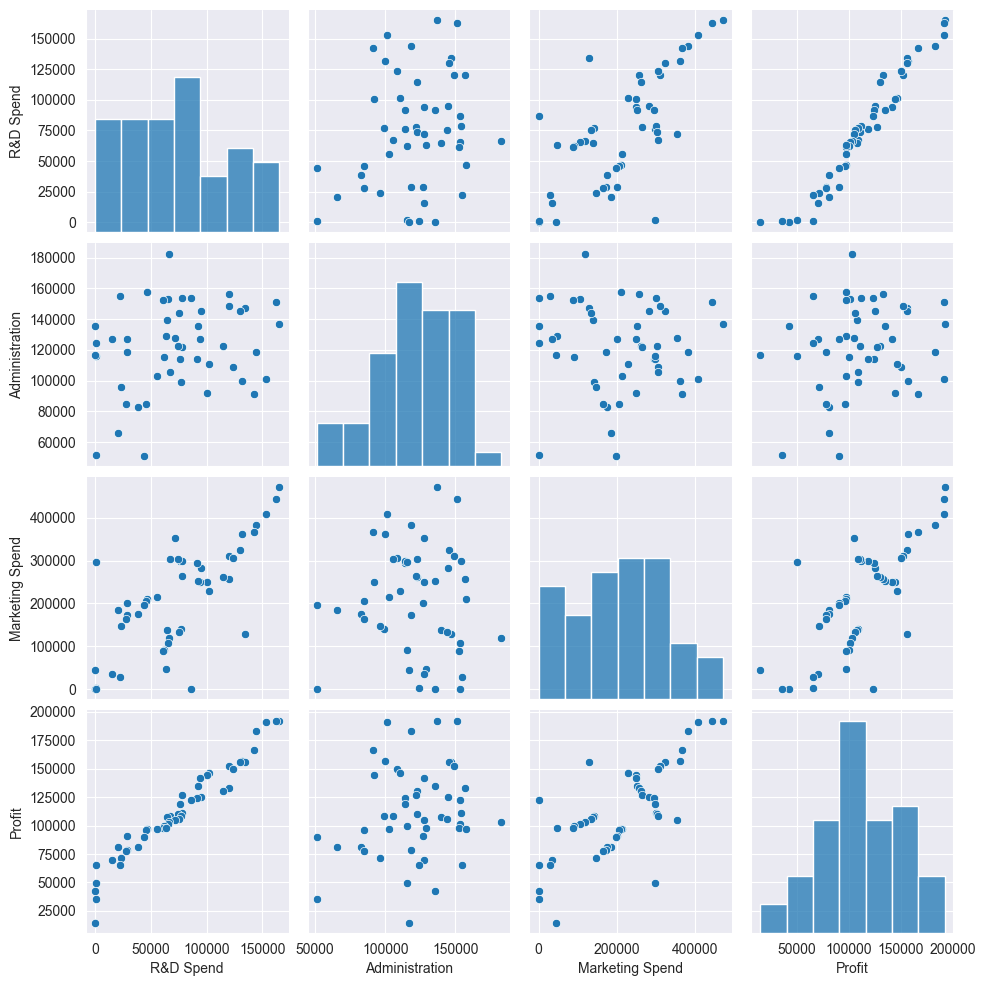

In [14]:
sns.set_style(style='darkgrid')
sns.pairplot(pt)

In [39]:
df1=df.rename({"R&D Spend":"rd",
                   "Administration":"admin",
                   "Marketing Spend":"ms",
               "State_California":"sc",
               "State_Florida":"sf"},axis=1)

In [40]:
df1.head(2)

,rd,admin,ms,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [41]:
df1.corr()

,rd,admin,ms,Profit
rd,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
ms,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [43]:
model=smf.ols("Profit~rd+admin+ms",data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        08:25:48   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rd             0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
ms             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# calculete Vif

In [42]:
rsq_rd = smf.ols('rd~admin+ms',data=df1).fit().rsquared
vif_rd = 1/(1-rsq_rd)
rsq_admin = smf.ols('admin~rd+ms',data=df1).fit().rsquared
vif_admin = 1/(1-rsq_admin)
rsq_ms = smf.ols('ms~admin+rd',data=df1).fit().rsquared
vif_ms = 1/(1-rsq_ms)


In [44]:
d1={'variables':['rd','admin','ms'],
    'vif':[vif_rd,vif_admin,vif_ms]}

In [45]:
vif=pd.DataFrame(d1)
vif

,variables,vif
0,rd,2.468903
1,admin,1.175091
2,ms,2.326773


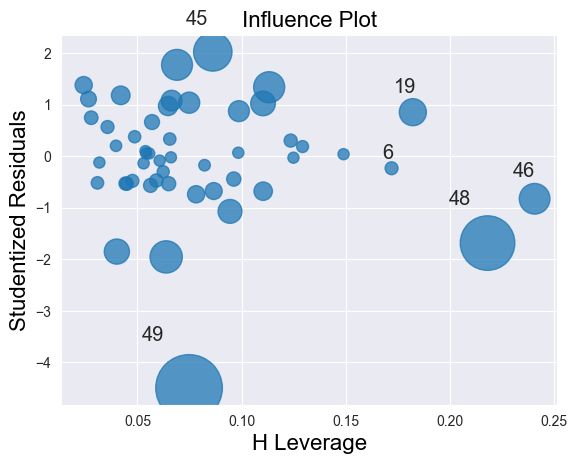

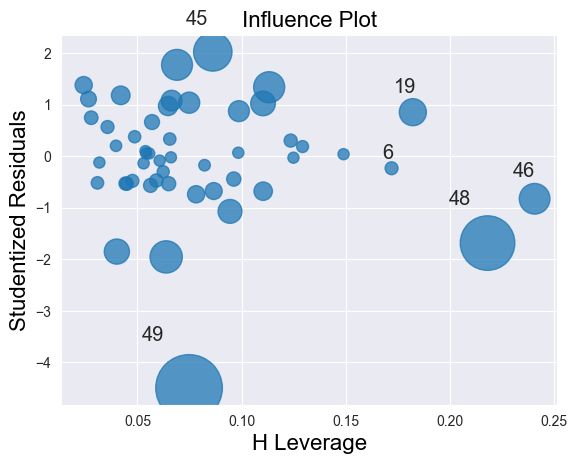

In [46]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)

In [47]:
df2 = df1.drop(df1.index[49],axis=0)
df2 

,rd,admin,ms,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [49]:
m1=smf.ols("Profit~admin+rd+ms",data=df2).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           8.85e-32
Time:                        08:45:20   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
rd             0.7830      0.038     20.470      0.000       0.706       0.860
ms             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# residual analysis
test for normality of residuals (Q-q plot)

In [50]:
res=m1.resid
res

0      1545.153001
1      4254.937773
2     10474.863604
3     10440.845358
4     -4675.546721
5     -5591.463177
6     -1618.828633
7     -3595.135318
8       882.943059
9     -4476.886778
10    10614.157318
11     8786.544379
12    12229.920551
13     6527.220861
14   -16692.754796
15   -16020.901975
16     9555.302079
17    -5038.256295
18    -4862.334457
19     6135.856879
20     1376.298134
21    -6597.999038
22    -4895.967796
23    -1869.149045
24    -5499.033877
25     4006.285615
26    -5814.098935
27    -9907.855026
28      255.150566
29    -2052.981761
30     -718.820227
31    -1604.653693
32    -2897.901335
33    -2183.383136
34     6160.492191
35     4770.221328
36    13627.635745
37     -773.363244
38     9796.038044
39    -4141.615646
40     1614.399697
41     1306.684825
42     -993.904974
43     7166.930282
44    -1825.401107
45    14468.782794
46    -8847.693625
47    -6816.046655
48   -15984.686812
dtype: float64

In [51]:
res.mean()    #it is near 0 but not equal to 0

8.463869061397046e-12

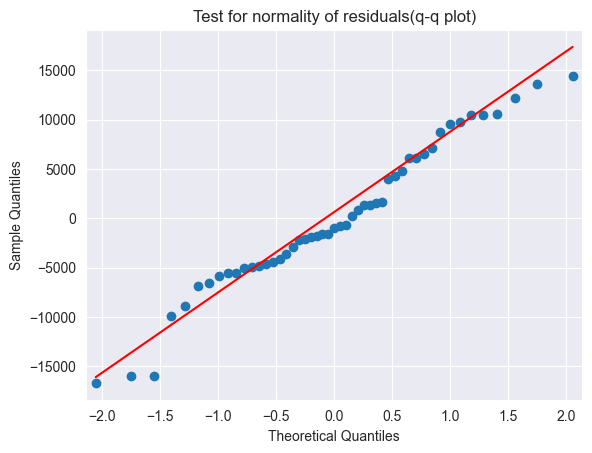

In [52]:
import statsmodels.api as sm
qqplot=sm.qqplot(res,line="q") 
plt.title("Test for normality of residuals(q-q plot)")
plt.show()

In [53]:
list(np.where(m1.resid<-15000))

[array([14, 15, 48], dtype=int64)]

# residual plot for homosceasity

In [55]:
def get_Stardardized_values(vals):
    return(vals - vals.mean())/(vals.std())

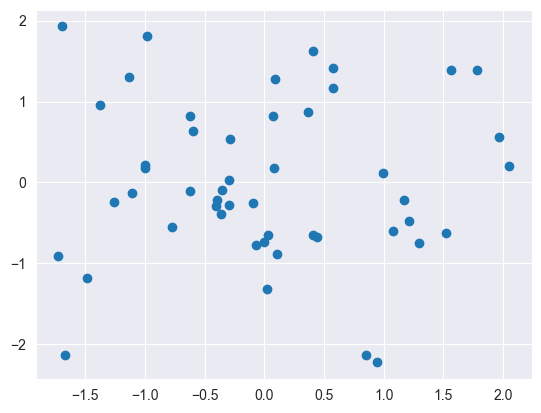

In [56]:
plt.scatter(get_Stardardized_values(m1.fittedvalues),
            get_Stardardized_values(m1.resid))

# residual vs Regressor

eval_env: 1


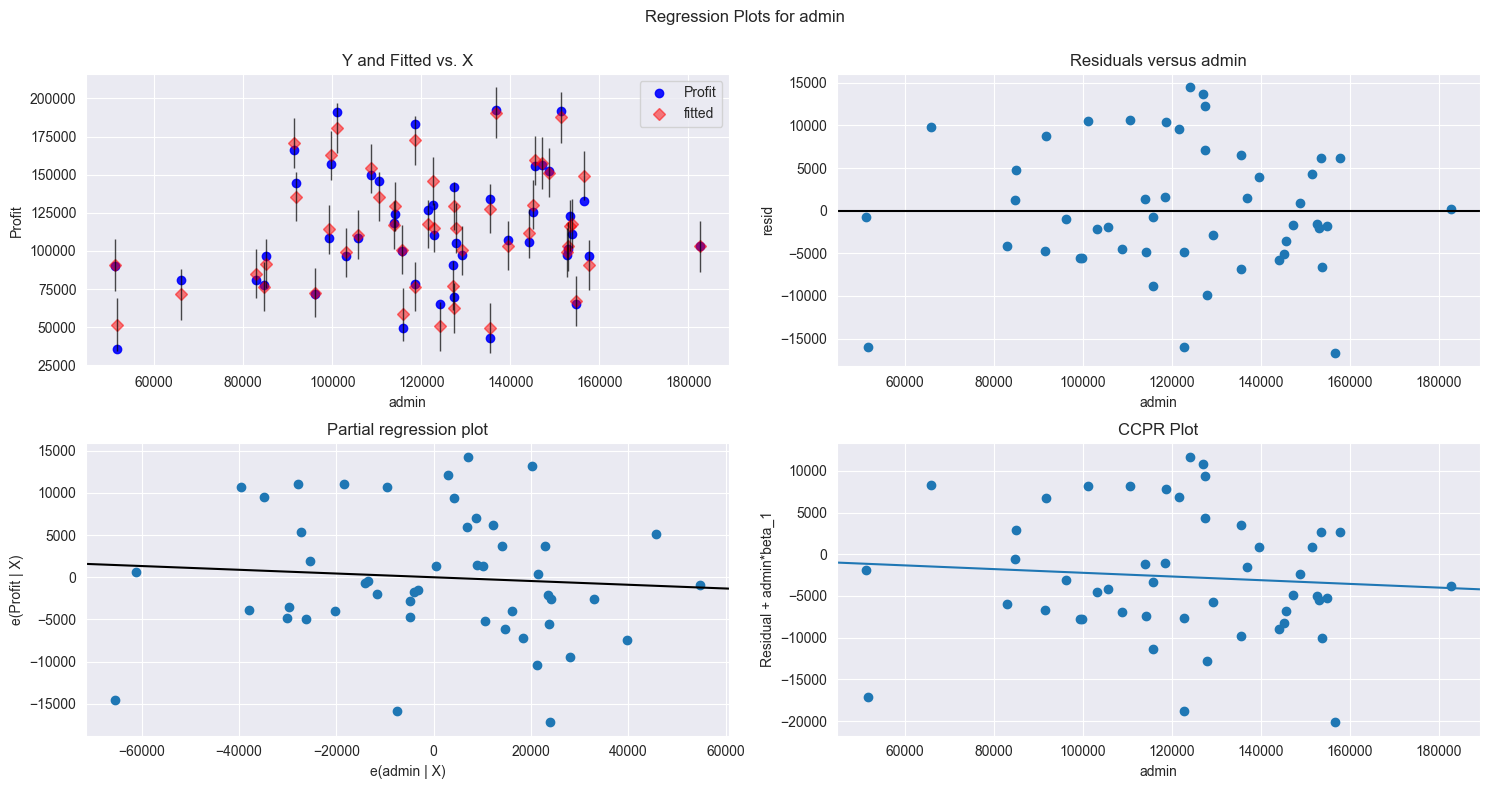

In [57]:
fig= plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(m1,'admin',fig=fig)
plt.show()

eval_env: 1


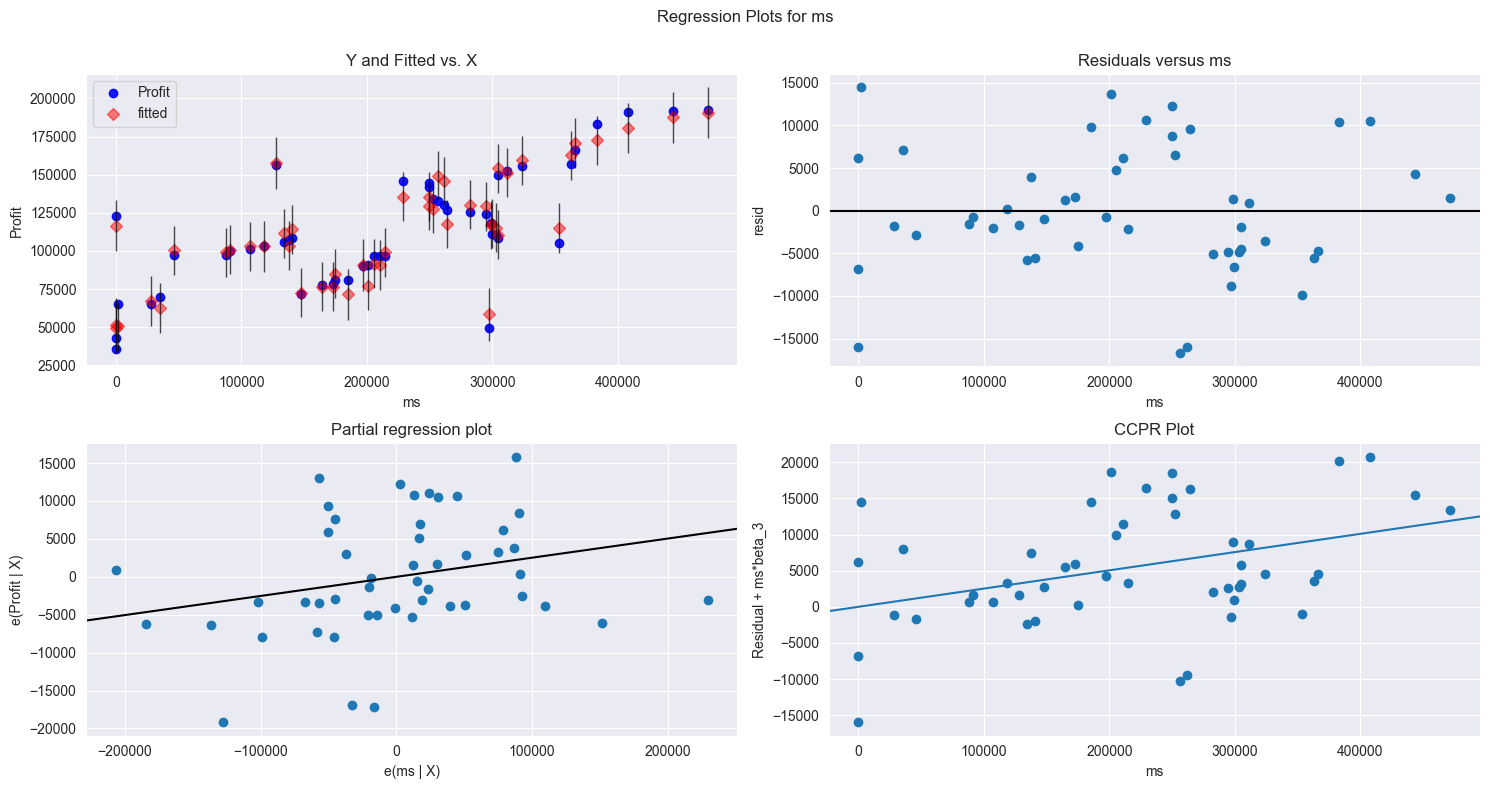

In [58]:
fig= plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(m1,'ms',fig=fig)
plt.show()

eval_env: 1


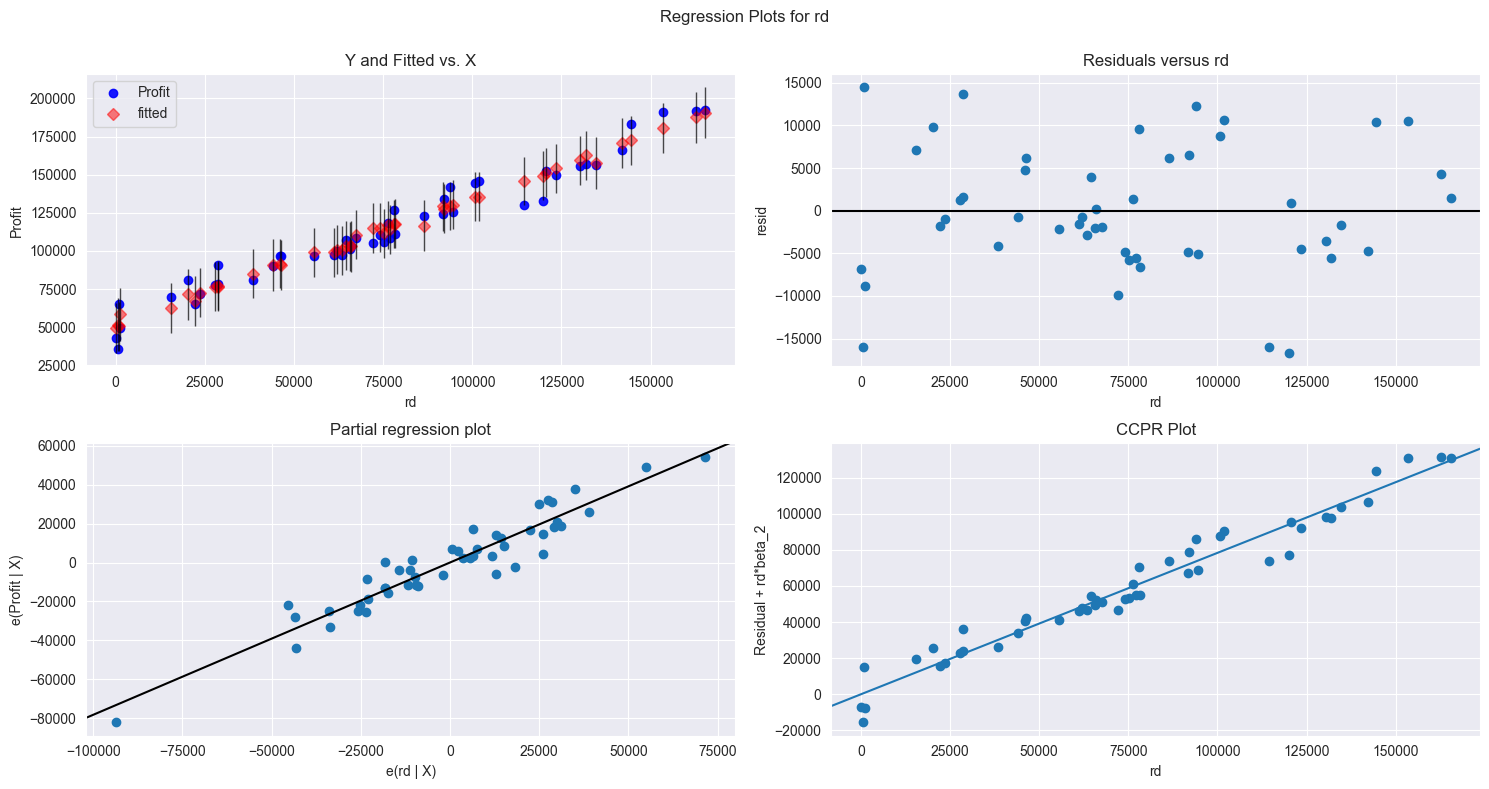

In [59]:
fig= plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(m1,'rd',fig=fig)
plt.show()

# model deletion diagnostic

In [61]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = m1.get_influence()
(c, _)= model_influence.cooks_distance
c

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

Text(0, 0.5, 'cooks distance')

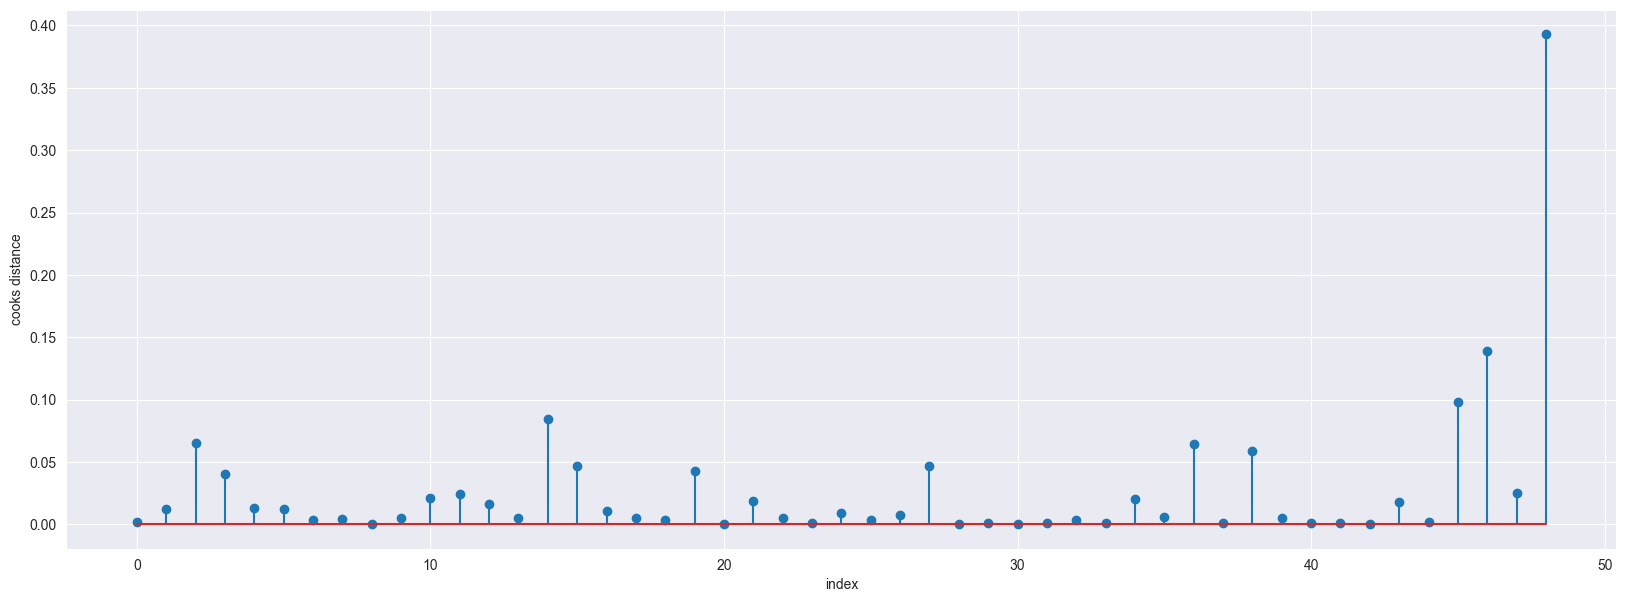

In [62]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df2)),np.round(c,3))
plt.xlabel("index")
plt.ylabel("cooks distance")

In [63]:
np.argmax(c),np.max(c)

(48, 0.39274420556321293)

In [64]:
new_data=df2.drop(df2.index[[48]],axis=0).reset_index()

In [65]:
new_data.head()

,index,rd,admin,ms,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [66]:
data2=new_data.copy()
data2.head()

,index,rd,admin,ms,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [68]:
final_m=smf.ols("Profit~rd+admin+ms",data=data2).fit()
final_m.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           2.03e-31
Time:                        08:51:19   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
rd             0.7895      0.036     21.718      0.000       0.716       0.863
admin         -0.0633      0.044     -1.442      0.156      -0.152       0.025
ms             0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
final_m.rsquared,final_m.aic

(0.9626766170294073, 994.6690439260116)

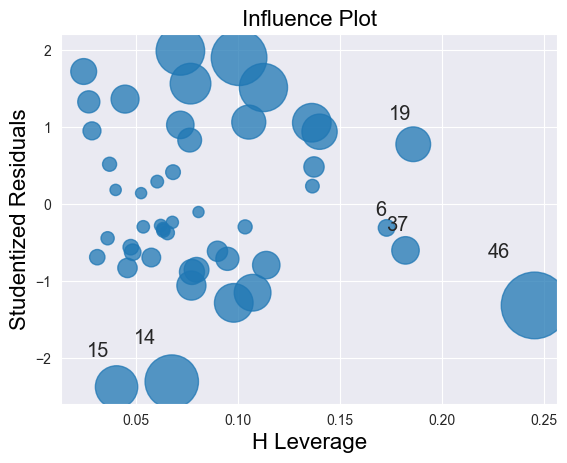

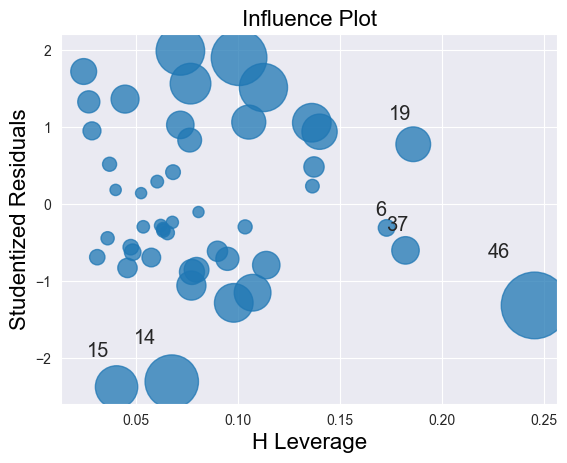

In [70]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_m)

# preict for new data

In [71]:
new_dataa=pd.DataFrame({'rd':162597.7,'admin':151377.59,'ms':443898.53,"sc":1,"sf":0},index=[1])

In [72]:
new_dataa

,rd,admin,ms,sc,sf
1,162597.7,151377.59,443898.53,1,0


In [73]:
pred_y=final_m.predict(new_dataa)
pred_y

1    185378.579127
dtype: float64

In [74]:
data2["predicted"] = final_m.fittedvalues
data2["erro"] = data2["Profit"]-data2["predicted"]
data2.head()

,index,rd,admin,ms,State,Profit,predicted,erro
0,0,165349.20,136897.80,471784.10,New York,192261.83,188939.277484,3322.552516
1,1,162597.70,151377.59,443898.53,California,191792.06,185378.579127,6413.480873
2,2,153441.51,101145.55,407934.54,Florida,191050.39,180724.354190,10326.035810
3,3,144372.41,118671.85,383199.62,New York,182901.99,172036.176973,10865.813027
4,4,142107.34,91391.77,366168.42,Florida,166187.94,171688.341312,-5500.401312
